### Imports

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams['font.size'] = 14

### Dataframe

In [2]:
dataframe = pd.read_csv("IntelData.csv")
newDF = dataframe.copy(deep=True)
newDF.drop(['Distribution Center','Product Offering','Generation','ASP Group','Week','Customer Orders'], axis = 1, inplace = True)
newDF = newDF.set_index([newDF.groupby('SKU')['SKU'].cumcount(), 'SKU'])['Forecasted Demand'].unstack()
newDF.index.rename('Index', inplace=True)
bin01 = newDF.describe().loc[['mean','count','std']]

In [3]:
var = newDF.var()
var = var.to_frame("var")
bin01 = bin01.transpose()
bin01['var'] = var
bin01 = bin01.sort_values(by="var", axis=0, ascending=False)
bin01['mu-sigma'] = bin01['mean'] - bin01['std']
bin01['mu+sigma'] = bin01['mean'] + bin01['std']
bin01 = bin01[['count','mu-sigma','mean','mu+sigma','std','var']]
vList = list(bin01['var'])
vList == sorted(vList,reverse=True)

True

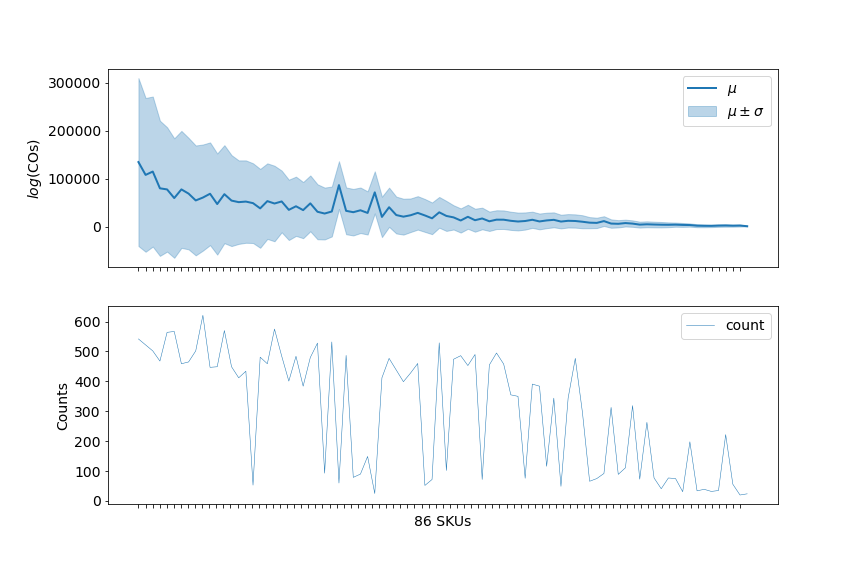

In [49]:
num = "Distribution of SKUs"
if plt.fignum_exists(num):plt.close(num)
fig,ax=plt.subplots(num=num, nrows=2, figsize=((12,8)))

idx = np.linspace(0,len(bin01),len(bin01))

# ax[0].plot(idx,(bin01['mean']), color="C0", lw=2,label = "$\mu$")
# ax[0].fill_between(idx,(bin01['mu-sigma']),(bin01['mu+sigma']),color="C0",alpha=.3, label="$\mu \pm \sigma$")
# ax[0].set(ylabel="$CO$ $\\times 10^3$")
# ax[0].legend()
# ax[0].set_xticklabels([])
# ax[0].xaxis.set_ticks(np.arange(0, 86, 1))

ax[0].plot(idx,(bin01['mean']), color="C0", lw=2,label = "$\mu$")
# ax[0].set(yscale="linear")
ax[0].fill_between(idx,(bin01['mu-sigma']),(bin01['mu+sigma']),color="C0",alpha=.3, label="$\mu \pm \sigma$")
ax[0].set(ylabel="$log($COs$)$ ")
ax[0].legend()
ax[0].set_xticklabels([])
ax[0].xaxis.set_ticks(np.arange(0, 86, 1))


ax[1].plot(idx,bin01['count'].values, color="C0",lw=.5, label="count")
ax[1].legend()
# ax[1].set()
ax[1].set(xlabel="86 SKUs",ylabel="Counts",yscale="linear", xticklabels = [])
ax[1].xaxis.set_ticks(np.arange(0, 86, 1));



(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 2570.4 ,  8263.07, 13955.74, 19648.41, 25341.08, 31033.75,
        36726.42, 42419.09, 48111.76, 53804.43, 59497.1 ]),
 <BarContainer object of 10 artists>)

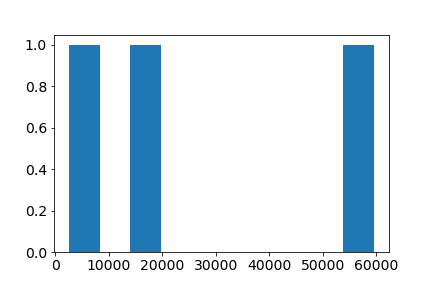

In [50]:
plt.close('all')
from scipy.stats.mstats import mquantiles
plt.hist(mquantiles(newDF['SKU-F-3']))

In [63]:
thisVariable = mquantiles(newDF,axis=0)

In [64]:
plt.close('all')
thisVariable

masked_array(
  data=[[  5255. ,   3503. ,   6960.6,      nan,      nan,  13439. ,
           2910.8,  15713.4,      nan,      nan,  11143.1,   7962. ,
          10188. ,      nan,   1911. ,      nan,   2999.7,   2350.6,
           4140. ,      nan,      nan,   7245. ,   2570.4,  16529. ,
              nan,   2384.2,   1115. ,   1911. ,      nan,      nan,
          12331. ,   2835.9,  10309.3,      nan,   1911. ,   1141.5,
           1752. ,      nan,   4948.8,   3694. ,   3822. ,      nan,
              nan,   5832.8,   7633.4,  11436.2,      nan,      nan,
           9188. ,   2745.4,   5732. ,      nan,      nan,   2293. ,
           2379.4,   1168.4,   3525.4,      nan,      nan,   6369. ,
           5414. ,   8089. ,      nan,      nan,   3721.2,   2548. ,
           6522.6,      nan,   4777. ,      nan,   3312. ,   2399.5,
           2246.6,      nan,   2240.2,   5096. ,      nan,   2135.6,
           5840.8,      nan,   7254.9,      nan,   4863.4,      nan,
              nan,  

In [62]:
type(thisVariable)

numpy.ma.core.MaskedArray

In [65]:
newDF

SKU,SKU-A-2,SKU-A-3,SKU-A-4,SKU-A-5,SKU-B-1,SKU-B-2,SKU-B-3,SKU-B-4,SKU-B-5,SKU-C-1,...,SKU-T-5,SKU-U-3,SKU-U-4,SKU-U-5,SKU-V-4,SKU-V-5,SKU-W-4,SKU-W-5,SKU-X-5,SKU-Y-5
Index,,,,,,,,,,,,,,,,,,,,,
0,8949.0,0.0,0.0,0.0,605.0,11146.0,0.0,0.0,0.0,1274.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28089.0,159.0,0.0,0.0,748.0,478.0,0.0,0.0,0.0,18599.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24936.0,0.0,0.0,0.0,1513.0,22771.0,0.0,0.0,0.0,37834.0,...,0.0,74045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61338.0,159.0,0.0,0.0,780.0,70541.0,0.0,0.0,0.0,171099.0,...,0.0,0.0,0.0,0.0,2994.0,0.0,0.0,0.0,0.0,0.0
4,11338.0,0.0,0.0,0.0,1672.0,510732.0,478.0,0.0,0.0,3917.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# I think I have to sort it


In [69]:
q = mquantiles(newDF, prob=[0.05, 0.75],axis=0)

In [70]:
q

masked_array(
  data=[[4.533600e+02, 5.536000e+01, 3.573600e+02, 2.197000e+03,
                  nan, 3.916000e+02, 1.110000e+02, 5.536000e+01,
         4.624080e+03, 1.911000e+03, 3.180000e+02, 5.536000e+01,
         4.261600e+02, 1.281360e+03, 1.029000e+02, 7.170000e+02,
         2.204400e+02, 2.550000e+02, 2.390000e+02, 5.004800e+03,
         1.559260e+03, 3.253600e+02, 4.800000e+01, 9.600000e+01,
         2.386748e+04, 1.897200e+02, 5.536000e+01, 1.590000e+02,
         7.953300e+03, 5.621000e+03, 1.041080e+03, 1.183600e+02,
         1.183600e+02, 1.831288e+04, 2.390000e+02, 7.136000e+01,
         1.503600e+02, 2.156520e+03, 2.870000e+02, 1.417200e+02,
         2.623600e+02, 6.178000e+03, 8.985800e+02, 6.370000e+02,
         0.000000e+00, 6.400000e+01, 3.260700e+03,          nan,
         4.200800e+02, 4.800000e+01, 9.600000e+01, 5.899360e+03,
         9.697200e+02, 3.180000e+02, 2.303600e+02, 1.430000e+02,
         1.663600e+02, 9.367560e+03, 1.011860e+03, 5.143400e+02,
         2.

In [33]:
plotMe = newDF.describe().loc[['mean','std','variance']]

KeyError: "['variance'] not in index"

In [ ]:
plotMe.sort_values(by='var', axis=1, ascending=False)

In [ ]:
plotMe = plotMe.transpose()
plotMe

In [6]:
plotMe['mu-sigma'] = plotMe['mean'] - plotMe['std']
plotMe['mu+sigma'] = plotMe['mean'] + plotMe['std']

NameError: name 'plotMe' is not defined

In [7]:
sigmaColumn = plotMe['std']
plotMe.drop('std',axis=1,inplace=True)
plotMe

NameError: name 'plotMe' is not defined

In [8]:
plotMe = plotMe.sort_values(by='mean', axis=0, ascending=False)

NameError: name 'plotMe' is not defined

In [9]:
plotMe = plotMe[["mu-sigma", "mean", "mu+sigma"]]

NameError: name 'plotMe' is not defined

In [10]:
plotMe

NameError: name 'plotMe' is not defined

In [11]:
plt.rcParams['font.size'] = 14

In [12]:
plotMe

NameError: name 'plotMe' is not defined

NameError: name 'plotMe' is not defined

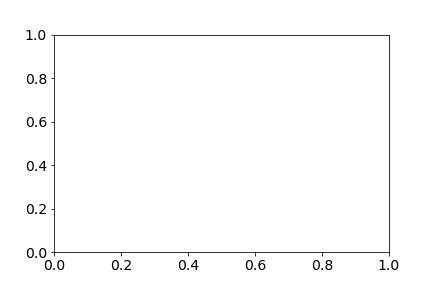

In [13]:
num = "Distribution of SKUs"
if plt.fignum_exists(num):plt.close(num)
fig,ax=plt.subplots(num=num)

idx = np.linspace(0,86,86)

ax.plot(idx,plotMe['mean']/1e3, color="C0", lw=2,label="$\mu$")
ax.fill_between(idx,plotMe['mu-sigma']/1e3,plotMe['mu+sigma']/1e3,color="C0",alpha=.3, label="$\mu \pm 1\sigma$")

ax.set(xlabel="SKUs", ylabel="Customer Orders $CO$ $\\times 10^3$")
ax.legend()

#https://stackoverflow.com/questions/50802556/how-to-plot-a-vertical-area-plot-with-pandas

#https://stackoverflow.com/questions/44982574/how-to-plot-vertical-scatter-using-only-matplotlib

<AxesSubplot:>

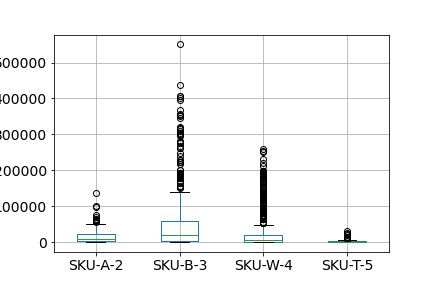

In [14]:
plt.close()
newDF.boxplot(column=['SKU-A-2', 'SKU-B-3', 'SKU-W-4','SKU-T-5']) #Picked arbitrary 4 columns.

In [15]:
## Box plot providing intuition about difference in variances. 

In [16]:
def funcToList(inputList):
    return [x for x in inputList if x == x]

In [17]:
skuA2 = funcToList(list(newDF['SKU-A-2']))
skuB3 = funcToList(list(newDF['SKU-B-3']))
skuW4 = funcToList(list(newDF['SKU-W-4']))
skuT5 = funcToList(list(newDF['SKU-T-5']))

In [18]:
theList = []
theList.append(skuA2)
theList.append(skuB3)
theList.append(skuW4)
theList.append(skuT5)


In [19]:
from scipy.stats import bartlett
stat, p = bartlett(*theList)

In [20]:
stat

986.011240961108

In [21]:
p

1.9484993280529378e-213

In [22]:
# p value less than 0.05 indicating UNEQUAL variances.

In [23]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [24]:
dataframe

,Distribution Center,Product Offering,Generation,SKU,ASP Group,Week,Forecasted Demand,Customer Orders
0,ALPHA,A,2,SKU-A-2,1,1,8949,11146
1,ALPHA,B,2,SKU-B-2,1,1,11146,3503
2,ALPHA,C,1,SKU-C-1,3,1,1274,5892
3,ALPHA,C,2,SKU-C-2,4,1,20717,3185
4,ALPHA,F,1,SKU-F-1,6,1,24522,6529
...,...,...,...,...,...,...,...,...
26109,EPSILON,V,4,SKU-V-4,18,187,35159,3822
26110,EPSILON,V,5,SKU-V-5,19,187,13439,10987
26111,EPSILON,W,4,SKU-W-4,21,187,37357,5414
26112,EPSILON,W,5,SKU-W-5,22,187,130382,35350


In [25]:
poC = dataframe.loc[dataframe['Product Offering'] == "C"]

In [26]:
poC

,Distribution Center,Product Offering,Generation,SKU,ASP Group,Week,Forecasted Demand,Customer Orders
2,ALPHA,C,1,SKU-C-1,3,1,1274,5892
3,ALPHA,C,2,SKU-C-2,4,1,20717,3185
27,GAMMA,C,1,SKU-C-1,3,1,18599,13217
28,GAMMA,C,2,SKU-C-2,4,1,101879,35987
51,DELTA,C,1,SKU-C-1,3,1,37834,6815
...,...,...,...,...,...,...,...,...
26002,GAMMA,C,5,SKU-C-5,5,187,130796,40287
26037,DELTA,C,4,SKU-C-4,4,187,61529,34411
26038,DELTA,C,5,SKU-C-5,5,187,58248,34873
26076,EPSILON,C,4,SKU-C-4,4,187,356768,20541


In [27]:
poC = poC.drop(['Distribution Center','Product Offering','Generation','SKU','ASP Group','Week'],axis=1)

In [28]:
poC

,Forecasted Demand,Customer Orders
2,1274,5892
3,20717,3185
27,18599,13217
28,101879,35987
51,37834,6815
...,...,...
26002,130796,40287
26037,61529,34411
26038,58248,34873
26076,356768,20541


In [29]:
poC['FA'] = poC['Forecasted Demand']/(poC['Forecasted Demand'] + poC['Customer Orders'])

In [30]:
poC

,Forecasted Demand,Customer Orders,FA
2,1274,5892,0.177784
3,20717,3185,0.866748
27,18599,13217,0.584580
28,101879,35987,0.738971
51,37834,6815,0.847365
...,...,...,...
26002,130796,40287,0.764518
26037,61529,34411,0.641328
26038,58248,34873,0.625509
26076,356768,20541,0.945559


Text(0.5, 0, 'Density')

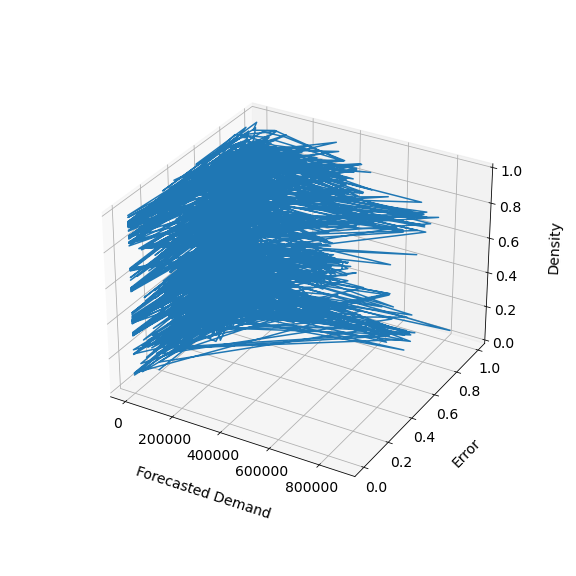

In [34]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()

x = np.linspace(min(poC['Forecasted Demand']),max(poC['Forecasted Demand']),100)
y = np.linspace(min(poC['FA']),max(poC['FA']),1873)
z = np.linspace(min(poC['FA']),max(poC['FA']),1873)




x = poC['Forecasted Demand']
y = poC['FA']
z = np.linspace(0,1,1873)



ax.plot3D(x, y, z)
ax.set_xlabel('Forecasted Demand', labelpad=20)
ax.set_ylabel('Error', labelpad=20)
ax.set_zlabel('Density', labelpad=20)

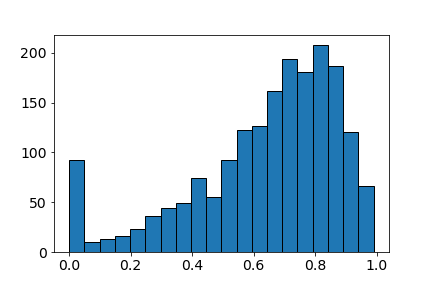

In [32]:
plt.close('all')
plt.hist(poC['FA'], density = False, bins= 20, edgecolor="black")
plt.show()